In [24]:
import pickle
import pandas as pd
import numpy as np

In [9]:
result_file = open('results_v1.pth', 'rb')     
result = pickle.load(result_file)

In [41]:
result_df = pd.read_csv('inference.csv')

In [47]:
result_df

,image_links,true_descriptions,generated_descriptions
0,https://www.wga.hu/detail/a/aertsen/apostles.jpg,Apostles Peter and John,['What title would you give this artwork?|>Sai...
1,https://www.wga.hu/detail/a/aertsen/christ_m.jpg,Christ in the House of Martha and Mary,['Describe the artwork|>St|>Saint Jerome<|endo...
2,https://www.wga.hu/detail/a/agabiti/altar1.jpg,Virgin Enthroned between Sts John the Baptist ...,['What title would you give this artwork?|>The...
3,https://www.wga.hu/detail/a/agabiti/altar32.jpg,Sts Sebastian and Roch,['What is the subject matter?|>Hl. Christ and ...
4,https://www.wga.hu/detail/a/agabiti/altar33.jpg,St Jerome in the Desert,['Describe the artwork|>Virgin and Child<|endo...
5,https://www.wga.hu/detail/a/agabiti/sacred.jpg,"Sacred Representation with Sts Francis, Anthon...","['Describe the agents in painting.|>Christ, at..."
6,https://www.wga.hu/detail/a/agresti/virgin_c.jpg,Virgin and Child with St John the Baptist and ...,['Describe the painting.|>Saint Jerome<|endoft...
7,https://www.wga.hu/detail/a/akotanto/cardioti.jpg,The Virgin Cardiotissa,['What symbols do you notice in the artwork?|>...
8,https://www.wga.hu/detail/a/albani/1/holy_fam.jpg,The Holy Family,['What is this painting about?|>Hl. Egypt<|end...
9,https://www.wga.hu/detail/a/albani/1/holyfam.jpg,The Holy Family in a Landscape,['What title would you give this artwork?|>The...


In [42]:
result_df.iloc[5].generated_descriptions

"['Describe the agents in painting.|>Christ, at the Baptist<|endoftext|>']"

In [43]:
result_df.true_descriptions

0                               Apostles Peter and John
1                Christ in the House of Martha and Mary
2     Virgin Enthroned between Sts John the Baptist ...
3                                Sts Sebastian and Roch
4                               St Jerome in the Desert
5     Sacred Representation with Sts Francis, Anthon...
6     Virgin and Child with St John the Baptist and ...
7                                The Virgin Cardiotissa
8                                       The Holy Family
9                        The Holy Family in a Landscape
10                                          Holy Family
11                                 St John fresco cycle
12                                     Virgin and Child
13                                     Virgin and Child
14           Scenes from the life of St Jerome (detail)
15                                    Most Holy Trinity
16                 The Preaching of St John the Baptist
17                        St Peter Walking on th

In [61]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import requests

In [68]:
link = result_df.iloc[10]['image_links']

In [64]:
image = cv2.imread(link)

[ WARN:0@166.433] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('https://www.wga.hu/detail/a/albani/1/holyfami.jpg'): can't open/read file: check file path/integrity


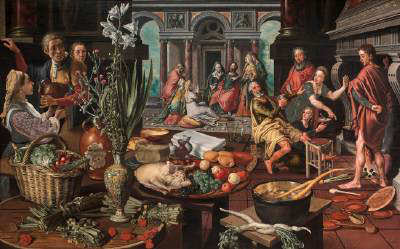

In [69]:
Image.open(requests.get(link, stream = True).raw)

In [70]:
result_df.true_descriptions.iloc[1]

'Christ in the House of Martha and Mary'

In [71]:
result_df.generated_descriptions.iloc[1].split(">")[-2]

'Saint Jerome<|endoftext|'

In [45]:
result_df.generated_descriptions

0     ['What title would you give this artwork?|>Sai...
1     ['Describe the artwork|>St|>Saint Jerome<|endo...
2     ['What title would you give this artwork?|>The...
3     ['What is the subject matter?|>Hl. Christ and ...
4     ['Describe the artwork|>Virgin and Child<|endo...
5     ['Describe the agents in painting.|>Christ, at...
6     ['Describe the painting.|>Saint Jerome<|endoft...
7     ['What symbols do you notice in the artwork?|>...
8     ['What is this painting about?|>Hl. Egypt<|end...
9     ['What title would you give this artwork?|>The...
10    ['Best title for this painting|>The Holy Famil...
11    [' |Describe the agents in painting.|>Saint Jo...
12    ['Describe the artwork|>Christ on in this artw...
13    ['Caption this painting|>The|>The Holy Family<...
14    ['What is this painting about?|>Saint Cec Carr...
15    ['What’s going on in this artwork?|>The from t...
16    ['Describe the artwork|>Virgin and Child with ...
17    ['Describe the icons in painting.|>Saint P

In [10]:
result

{'image_links': ['https://www.wga.hu/detail/a/aertsen/apostles.jpg',
  'https://www.wga.hu/detail/a/aertsen/christ_m.jpg',
  'https://www.wga.hu/detail/a/agabiti/altar1.jpg',
  'https://www.wga.hu/detail/a/agabiti/altar32.jpg',
  'https://www.wga.hu/detail/a/agabiti/altar33.jpg',
  'https://www.wga.hu/detail/a/agabiti/sacred.jpg',
  'https://www.wga.hu/detail/a/agresti/virgin_c.jpg',
  'https://www.wga.hu/detail/a/akotanto/cardioti.jpg',
  'https://www.wga.hu/detail/a/albani/1/holy_fam.jpg',
  'https://www.wga.hu/detail/a/albani/1/holyfam.jpg',
  'https://www.wga.hu/detail/a/albani/1/holyfami.jpg',
  'https://www.wga.hu/detail/a/albert/oratory.jpg',
  'https://www.wga.hu/detail/a/albertin/virgin.jpg',
  'https://www.wga.hu/detail/a/albertin/virgin_c.jpg',
  'https://www.wga.hu/detail/a/allori/alessand/gaddi2.jpg',
  'https://www.wga.hu/detail/a/allori/alessand/holytrin.jpg',
  'https://www.wga.hu/detail/a/allori/alessand/preachin.jpg',
  'https://www.wga.hu/detail/a/allori/alessand/st_

In [6]:
result_df = pd.DataFrame({"links": result['image_links'], "generated_titles": result['generated_descriptions'], "images": result['image_links']})

NameError: name 'pd' is not defined